# Week 1: Introduction to Statistics and Data Types

**Course**: Statistics for Data Science I (BSMA1002)  
**Date**: November 16, 2025  
**Topics**: Introduction to Statistics, Data Types, Measurement Scales

---

## 🎯 Learning Objectives

By the end of this notebook, you will be able to:
1. Distinguish between descriptive and inferential statistics
2. Identify and classify different types of data (qualitative vs quantitative)
3. Understand the four scales of measurement (nominal, ordinal, interval, ratio)
4. Apply appropriate statistical methods based on data type
5. Use Python to analyze and visualize different data types
6. Make informed decisions about feature encoding in machine learning

---

## 📋 Prerequisites

- Basic Python programming
- Understanding of pandas DataFrames
- NumPy basics
- Matplotlib for visualization

---

## 💡 Why This Matters for Data Science

Understanding data types is **fundamental** to:
- **Exploratory Data Analysis**: Choose right visualizations and summary statistics
- **Feature Engineering**: Apply appropriate transformations and encodings
- **Model Selection**: Pick algorithms suitable for your data
- **Interpretation**: Make valid conclusions from analysis

**Key Insight**: Using wrong statistical methods for your data type leads to meaningless results! 🚨

---

In [1]:
# ============================================================================
# SETUP: Import Required Libraries
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Configure visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

print("=" * 80)
print("STATISTICS TOOLKIT - WEEK 1")
print("=" * 80)
print(f"✓ NumPy version: {np.__version__}")
print(f"✓ Pandas version: {pd.__version__}")
print(f"✓ Matplotlib version: {plt.matplotlib.__version__}")
print("✓ Environment ready for statistical analysis!")
print("=" * 80)

STATISTICS TOOLKIT - WEEK 1
✓ NumPy version: 2.3.4
✓ Pandas version: 2.3.3
✓ Matplotlib version: 3.10.7
✓ Environment ready for statistical analysis!


## Part 1: Descriptive vs Inferential Statistics

### Descriptive Statistics
- Summarizes and describes features of a dataset
- Uses measures like mean, median, mode, standard deviation
- Visualizes with histograms, bar charts, box plots
- **Goal**: Understand what the data shows

### Inferential Statistics
- Makes predictions and inferences about populations from samples
- Uses hypothesis testing, confidence intervals, regression
- **Goal**: Make decisions and predictions beyond the observed data

| Aspect | Descriptive | Inferential |
|--------|------------|-------------|
| Purpose | Summarize data | Make predictions |
| Scope | Sample only | Population from sample |
| Methods | Mean, median, charts | Hypothesis tests, CI |
| Example | "Average age = 25" | "Population age likely 23-27" |

PART 1: DESCRIPTIVE VS INFERENTIAL STATISTICS

EXAMPLE: Exam Scores Analysis

📊 DESCRIPTIVE STATISTICS (What we observe in our sample):
  Sample size: 50
  Sample mean: 72.75
  Sample median: 72.66
  Sample std dev: 9.34
  Sample range: [55.40, 93.52]


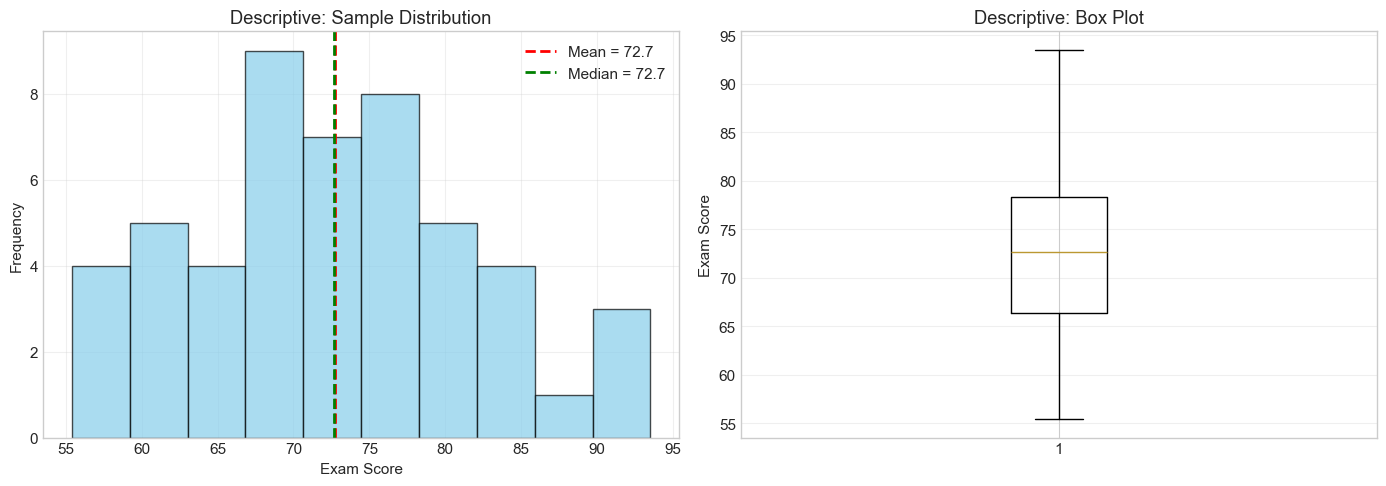


🔮 INFERENTIAL STATISTICS (What we infer about the population):
  We are 95% confident that the TRUE population mean is between 70.09 and 75.40
  Standard error: 1.32
  Margin of error: 2.65

  Hypothesis Test:
    H₀: μ = 72 (null hypothesis)
    H₁: μ ≠ 72 (alternative hypothesis)
    t-statistic: 0.564
    p-value: 0.5750
    ✗ Fail to reject H₀: No significant difference (p >= 0.05)

Key Difference:
  Descriptive → 'The sample mean is 75.2'
  Inferential → 'The population mean is likely between 72.3 and 78.1'


In [2]:
# ============================================================================
# PART 1: DESCRIPTIVE VS INFERENTIAL STATISTICS
# ============================================================================

print("=" * 80)
print("PART 1: DESCRIPTIVE VS INFERENTIAL STATISTICS")
print("=" * 80)

# Simulate a sample dataset: exam scores
np.random.seed(42)
sample_scores = np.random.normal(loc=75, scale=10, size=50)  # Sample of 50 students

print("\n" + "=" * 80)
print("EXAMPLE: Exam Scores Analysis")
print("=" * 80)

# DESCRIPTIVE STATISTICS
print("\n📊 DESCRIPTIVE STATISTICS (What we observe in our sample):")
print(f"  Sample size: {len(sample_scores)}")
print(f"  Sample mean: {np.mean(sample_scores):.2f}")
print(f"  Sample median: {np.median(sample_scores):.2f}")
print(f"  Sample std dev: {np.std(sample_scores, ddof=1):.2f}")
print(f"  Sample range: [{sample_scores.min():.2f}, {sample_scores.max():.2f}]")

# Visualize descriptive statistics
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(sample_scores, bins=10, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].axvline(np.mean(sample_scores), color='red', linestyle='--', linewidth=2, label=f'Mean = {np.mean(sample_scores):.1f}')
axes[0].axvline(np.median(sample_scores), color='green', linestyle='--', linewidth=2, label=f'Median = {np.median(sample_scores):.1f}')
axes[0].set_xlabel('Exam Score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Descriptive: Sample Distribution')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(sample_scores, vert=True)
axes[1].set_ylabel('Exam Score')
axes[1].set_title('Descriptive: Box Plot')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# INFERENTIAL STATISTICS
print("\n🔮 INFERENTIAL STATISTICS (What we infer about the population):")

# Calculate 95% confidence interval for population mean
confidence_level = 0.95
degrees_freedom = len(sample_scores) - 1
sample_mean = np.mean(sample_scores)
sample_se = stats.sem(sample_scores)  # Standard error
ci = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_se)

print(f"  We are 95% confident that the TRUE population mean is between {ci[0]:.2f} and {ci[1]:.2f}")
print(f"  Standard error: {sample_se:.2f}")
print(f"  Margin of error: {(ci[1] - ci[0])/2:.2f}")

# Hypothesis test: Is population mean significantly different from 72?
null_hypothesis_mean = 72
t_statistic, p_value = stats.ttest_1samp(sample_scores, null_hypothesis_mean)

print(f"\n  Hypothesis Test:")
print(f"    H₀: μ = {null_hypothesis_mean} (null hypothesis)")
print(f"    H₁: μ ≠ {null_hypothesis_mean} (alternative hypothesis)")
print(f"    t-statistic: {t_statistic:.3f}")
print(f"    p-value: {p_value:.4f}")

if p_value < 0.05:
    print(f"    ✓ Reject H₀: Population mean is significantly different from {null_hypothesis_mean} (p < 0.05)")
else:
    print(f"    ✗ Fail to reject H₀: No significant difference (p >= 0.05)")

print("\n" + "=" * 80)
print("Key Difference:")
print("  Descriptive → 'The sample mean is 75.2'")
print("  Inferential → 'The population mean is likely between 72.3 and 78.1'")
print("=" * 80)

## Part 2: Types of Data

### Qualitative Data (Categorical)
Data representing **categories** or **labels** (non-numeric in nature)

**Nominal**: No order
- Examples: Gender, Color, City, Brand
- Operations: Count, mode
- Visualization: Bar chart, pie chart

**Ordinal**: Natural order
- Examples: Education level, Satisfaction rating, Size (S/M/L)
- Operations: Count, mode, median
- Visualization: Ordered bar chart

### Quantitative Data (Numerical)
Data representing **quantities** (numeric values)

**Discrete**: Countable
- Examples: Number of students, Items sold, Defects
- Operations: All mathematical operations
- Visualization: Bar chart, histogram

**Continuous**: Measurable (any value in range)
- Examples: Height, Temperature, Income, Time
- Operations: All mathematical operations
- Visualization: Histogram, density plot, box plot

In [3]:
# ============================================================================
# PART 2: TYPES OF DATA - EXAMPLES AND VISUALIZATION
# ============================================================================

print("\n" + "=" * 80)
print("PART 2: TYPES OF DATA")
print("=" * 80)

# Create sample dataset
np.random.seed(42)
n_samples = 200

# Create DataFrame with different data types
data = pd.DataFrame({
    # NOMINAL (Qualitative - No order)
    'City': np.random.choice(['Mumbai', 'Delhi', 'Bangalore', 'Chennai'], n_samples),
    'Gender': np.random.choice(['Male', 'Female', 'Non-binary'], n_samples),
    
    # ORDINAL (Qualitative - Ordered)
    'Education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], n_samples),
    'Satisfaction': np.random.choice(['Very Unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very Satisfied'], n_samples),
    
    # DISCRETE (Quantitative - Countable)
    'Children': np.random.poisson(lam=1.5, size=n_samples),
    'Purchases_Last_Month': np.random.randint(0, 15, n_samples),
    
    # CONTINUOUS (Quantitative - Measurable)
    'Age': np.random.normal(35, 10, n_samples),
    'Income': np.random.lognormal(11, 0.5, n_samples),  # Log-normal for realistic income distribution
})

# Ensure positive values
data['Age'] = data['Age'].clip(18, 70)
data['Children'] = data['Children'].clip(0, 6)

print("\n📊 Sample Dataset Overview:")
print(data.head(10))

print("\n" + "=" * 80)
print("DATA TYPE CLASSIFICATION")
print("=" * 80)

print("\n1. NOMINAL DATA (Qualitative - No Order):")
print(f"   • City: {data['City'].unique()}")
print(f"     → {len(data['City'].unique())} unique categories")
print(f"   • Gender: {data['Gender'].unique()}")
print(f"     → {len(data['Gender'].unique())} unique categories")

print("\n2. ORDINAL DATA (Qualitative - Ordered):")
print(f"   • Education: {data['Education'].unique()}")
print("     → Order: High School < Bachelor < Master < PhD")
print(f"   • Satisfaction: {data['Satisfaction'].unique()}")
print("     → Order: Very Unsatisfied < ... < Very Satisfied")

print("\n3. DISCRETE DATA (Quantitative - Countable):")
print(f"   • Children: min={data['Children'].min()}, max={data['Children'].max()}")
print(f"     → Countable values: {sorted(data['Children'].unique())}")
print(f"   • Purchases: min={data['Purchases_Last_Month'].min()}, max={data['Purchases_Last_Month'].max()}")

print("\n4. CONTINUOUS DATA (Quantitative - Measurable):")
print(f"   • Age: min={data['Age'].min():.1f}, max={data['Age'].max():.1f}")
print(f"     → Can have any value within range")
print(f"   • Income: min=₹{data['Income'].min():.0f}, max=₹{data['Income'].max():.0f}")

# ============================================================================
# VISUALIZATIONS FOR EACH DATA TYPE
# ============================================================================

fig = plt.figure(figsize=(16, 10))

# 1. NOMINAL: Bar chart for City
ax1 = plt.subplot(2, 4, 1)
city_counts = data['City'].value_counts()
ax1.bar(city_counts.index, city_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
ax1.set_title('Nominal Data: City\n(No natural order)', fontweight='bold')
ax1.set_xlabel('City')
ax1.set_ylabel('Frequency')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# 2. NOMINAL: Pie chart for Gender
ax2 = plt.subplot(2, 4, 2)
gender_counts = data['Gender'].value_counts()
colors = ['#FF9AA2', '#B5EAD7', '#C7CEEA']
ax2.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
ax2.set_title('Nominal Data: Gender\n(No natural order)', fontweight='bold')

# 3. ORDINAL: Ordered bar chart for Education
ax3 = plt.subplot(2, 4, 3)
education_order = ['High School', 'Bachelor', 'Master', 'PhD']
education_counts = data['Education'].value_counts().reindex(education_order)
bars = ax3.bar(education_order, education_counts.values, color=['#FFE66D', '#FFAD84', '#FF6F61', '#D65B9E'])
ax3.set_title('Ordinal Data: Education\n(Natural order exists)', fontweight='bold')
ax3.set_xlabel('Education Level')
ax3.set_ylabel('Frequency')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3, axis='y')

# 4. ORDINAL: Ordered bar chart for Satisfaction
ax4 = plt.subplot(2, 4, 4)
satisfaction_order = ['Very Unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
satisfaction_counts = data['Satisfaction'].value_counts().reindex(satisfaction_order)
ax4.barh(satisfaction_order, satisfaction_counts.values, color=plt.cm.RdYlGn(np.linspace(0.2, 0.8, 5)))
ax4.set_title('Ordinal Data: Satisfaction\n(Natural order exists)', fontweight='bold')
ax4.set_xlabel('Frequency')
ax4.grid(True, alpha=0.3, axis='x')

# 5. DISCRETE: Bar chart for Children
ax5 = plt.subplot(2, 4, 5)
children_counts = data['Children'].value_counts().sort_index()
ax5.bar(children_counts.index, children_counts.values, color='#6C5CE7', alpha=0.7, edgecolor='black')
ax5.set_title('Discrete Data: Number of Children\n(Countable values)', fontweight='bold')
ax5.set_xlabel('Number of Children')
ax5.set_ylabel('Frequency')
ax5.set_xticks(range(int(data['Children'].max()) + 1))
ax5.grid(True, alpha=0.3, axis='y')

# 6. DISCRETE: Histogram for Purchases
ax6 = plt.subplot(2, 4, 6)
ax6.hist(data['Purchases_Last_Month'], bins=15, color='#00B894', alpha=0.7, edgecolor='black')
ax6.set_title('Discrete Data: Monthly Purchases\n(Countable values)', fontweight='bold')
ax6.set_xlabel('Number of Purchases')
ax6.set_ylabel('Frequency')
ax6.grid(True, alpha=0.3, axis='y')

# 7. CONTINUOUS: Histogram for Age
ax7 = plt.subplot(2, 4, 7)
ax7.hist(data['Age'], bins=20, color='#FD79A8', alpha=0.7, edgecolor='black')
ax7.axvline(data['Age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean = {data['Age'].mean():.1f}')
ax7.set_title('Continuous Data: Age\n(Any value in range)', fontweight='bold')
ax7.set_xlabel('Age (years)')
ax7.set_ylabel('Frequency')
ax7.legend()
ax7.grid(True, alpha=0.3, axis='y')

# 8. CONTINUOUS: Box plot for Income
ax8 = plt.subplot(2, 4, 8)
bp = ax8.boxplot(data['Income'], vert=True, patch_artist=True)
bp['boxes'][0].set_facecolor('#A29BFE')
bp['boxes'][0].set_alpha(0.7)
ax8.set_ylabel('Income (₹)')
ax8.set_title('Continuous Data: Income\n(Any value in range)', fontweight='bold')
ax8.grid(True, alpha=0.3, axis='y')
ax8.set_xticklabels(['Income'])

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("APPROPRIATE STATISTICS BY DATA TYPE")
print("=" * 80)

print("\n1. NOMINAL (City, Gender):")
print(f"   ✓ Mode (most frequent): City = {data['City'].mode()[0]}")
print(f"   ✓ Frequency counts available")
print(f"   ✗ Mean/Median NOT meaningful")

print("\n2. ORDINAL (Education, Satisfaction):")
print(f"   ✓ Mode: Education = {data['Education'].mode()[0]}")
print(f"   ✓ Median: Can find 'middle' satisfaction level")
print(f"   ⚠ Mean: Technically invalid (no equal intervals)")

print("\n3. DISCRETE (Children, Purchases):")
print(f"   ✓ Mean: Children = {data['Children'].mean():.2f}")
print(f"   ✓ Median: Purchases = {data['Purchases_Last_Month'].median():.0f}")
print(f"   ✓ All mathematical operations valid")

print("\n4. CONTINUOUS (Age, Income):")
print(f"   ✓ Mean: Age = {data['Age'].mean():.1f} years")
print(f"   ✓ Std Dev: Income = ₹{data['Income'].std():.0f}")
print(f"   ✓ All mathematical operations valid")

print("=" * 80)

SyntaxError: f-string: unmatched '[' (1852686589.py, line 129)

## Part 3: Scales of Measurement

The scale determines **what statistical operations are valid**.

### Hierarchy (each level adds properties):

**Nominal < Ordinal < Interval < Ratio**

| Scale | Identity | Order | Equal Intervals | True Zero | Examples |
|-------|----------|-------|-----------------|-----------|----------|
| **Nominal** | ✓ | ✗ | ✗ | ✗ | Gender, Color, City |
| **Ordinal** | ✓ | ✓ | ✗ | ✗ | Rankings, Satisfaction |
| **Interval** | ✓ | ✓ | ✓ | ✗ | Temperature (°C/°F), Year |
| **Ratio** | ✓ | ✓ | ✓ | ✓ | Height, Weight, Income |

### Valid Operations:

- **Nominal**: =, ≠, mode
- **Ordinal**: =, ≠, <, >, median, percentiles
- **Interval**: =, ≠, <, >, +, −, mean, std dev
- **Ratio**: All operations including ×, ÷, ratios

In [ ]:
# ============================================================================
# PART 3: SCALES OF MEASUREMENT - DETAILED EXAMPLES
# ============================================================================

print("\n" + "=" * 80)
print("PART 3: SCALES OF MEASUREMENT")
print("=" * 80)

# ============================================================================
# Example 1: NOMINAL SCALE
# ============================================================================

print("\n" + "=" * 80)
print("1. NOMINAL SCALE (Categories, No Order)")
print("=" * 80)

# Blood types dataset
blood_types = pd.Series(['A', 'B', 'O', 'AB', 'O', 'A', 'B', 'O', 'A', 'O', 'AB', 'B', 'O', 'A', 'O'])

print("\nBlood Type Data:")
print(blood_types.values)

print("\n✓ VALID OPERATIONS:")
print(f"  • Frequency counts:")
print(blood_types.value_counts().to_string())
print(f"\n  • Mode (most common): {blood_types.mode()[0]}")
print(f"  • Proportions:")
print((blood_types.value_counts() / len(blood_types)).to_string())

print("\n✗ INVALID OPERATIONS:")
print("  • Mean of blood types = MEANINGLESS")
print("  • 'A' + 'B' = MEANINGLESS")
print("  • 'O' > 'A' = MEANINGLESS")
print("\n  ⚠ Even if we code (A=1, B=2, O=3, AB=4), arithmetic is still meaningless!")

# ============================================================================
# Example 2: ORDINAL SCALE
# ============================================================================

print("\n" + "=" * 80)
print("2. ORDINAL SCALE (Categories WITH Order)")
print("=" * 80)

# Customer satisfaction ratings
satisfaction_ratings = pd.Series([
    'Satisfied', 'Very Satisfied', 'Neutral', 'Satisfied', 'Dissatisfied',
    'Very Satisfied', 'Satisfied', 'Neutral', 'Very Dissatisfied', 'Satisfied',
    'Very Satisfied', 'Satisfied', 'Neutral', 'Satisfied', 'Very Satisfied'
])

# Define order
satisfaction_order = ['Very Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
satisfaction_cat = pd.Categorical(satisfaction_ratings, categories=satisfaction_order, ordered=True)

print("\nSatisfaction Rating Data:")
print(satisfaction_cat)

# Encode as numbers (for analysis only)
satisfaction_encoded = satisfaction_cat.codes + 1  # 1-5 scale

print("\n✓ VALID OPERATIONS:")
print(f"  • Frequency counts:")
print(satisfaction_ratings.value_counts().reindex(satisfaction_order).to_string())
print(f"\n  • Median: {satisfaction_order[int(np.median(satisfaction_encoded)) - 1]}")
print(f"  • 75th percentile: {satisfaction_order[int(np.percentile(satisfaction_encoded, 75)) - 1]}")

print("\n⚠ TECHNICALLY INVALID (but often used):")
print(f"  • Mean (if coded 1-5): {satisfaction_encoded.mean():.2f}")
print("    → Assumes equal intervals between levels (may not be true!)")
print("    → 'Satisfied' - 'Neutral' may not equal 'Very Satisfied' - 'Satisfied'")

print("\n✗ CLEARLY INVALID:")
print("  • 'Very Satisfied' × 2 = MEANINGLESS")
print("  • Ratio: 'Very Satisfied' / 'Neutral' = MEANINGLESS")

# ============================================================================
# Example 3: INTERVAL SCALE
# ============================================================================

print("\n" + "=" * 80)
print("3. INTERVAL SCALE (Equal Intervals, No True Zero)")
print("=" * 80)

# Temperature data in Celsius
temperatures_celsius = np.array([10, 15, 20, 25, 30, 35, 40])

print("\nTemperature Data (°C):")
print(temperatures_celsius)

print("\n✓ VALID OPERATIONS:")
print(f"  • Mean: {temperatures_celsius.mean():.1f}°C")
print(f"  • Standard deviation: {temperatures_celsius.std():.1f}°C")
print(f"  • Difference: 30°C - 20°C = {30 - 20}°C")
print("    → Equal intervals: 10°C difference is consistent")

print("\n✗ INVALID OPERATIONS:")
print("  • Ratio: 40°C / 20°C = 2 does NOT mean 'twice as hot'")
print("  • Why? Because 0°C is arbitrary (not absence of temperature)")
print(f"  • Proof: Convert to Fahrenheit:")
celsius_to_fahrenheit = lambda c: (c * 9/5) + 32
print(f"    - 40°C = {celsius_to_fahrenheit(40):.1f}°F")
print(f"    - 20°C = {celsius_to_fahrenheit(20):.1f}°F")
print(f"    - Ratio in Fahrenheit: {celsius_to_fahrenheit(40) / celsius_to_fahrenheit(20):.2f} ≠ 2")
print("    → Ratios change with scale choice!")

# ============================================================================
# Example 4: RATIO SCALE
# ============================================================================

print("\n" + "=" * 80)
print("4. RATIO SCALE (Equal Intervals + True Zero)")
print("=" * 80)

# Height data in cm
heights = np.array([150, 160, 170, 180, 190, 200])

print("\nHeight Data (cm):")
print(heights)

print("\n✓ ALL OPERATIONS VALID:")
print(f"  • Mean: {heights.mean():.1f} cm")
print(f"  • Standard deviation: {heights.std():.1f} cm")
print(f"  • Difference: 180 cm - 160 cm = {180 - 160} cm")
print(f"  • Ratio: 180 cm / 90 cm = {180 / 90:.1f}")
print("    → Someone 180 cm IS twice as tall as someone 90 cm")
print(f"  • Proportion: 200 cm is {(200 / heights.mean()) * 100:.1f}% of mean height")

print("\n  • True Zero: 0 cm means NO height (absolute zero)")
print("  • Ratios are meaningful and consistent across units:")
print(f"    - In meters: {1.8 / 0.9:.1f} (still 2.0)")
print(f"    - In inches: {70.87 / 35.43:.1f} (still 2.0)")

# ============================================================================
# COMPARISON VISUALIZATION
# ============================================================================

print("\n" + "=" * 80)
print("VISUAL COMPARISON OF SCALES")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Nominal: Blood types
ax1 = axes[0, 0]
blood_counts = blood_types.value_counts()
ax1.bar(blood_counts.index, blood_counts.values, color=['#FF6B6B', '#4ECDC4', '#FFA07A', '#95E1D3'])
ax1.set_title('NOMINAL: Blood Type\n(No order, no math)', fontweight='bold', fontsize=12)
ax1.set_xlabel('Blood Type')
ax1.set_ylabel('Frequency')
ax1.text(0.5, 0.95, '✓ Mode\n✗ Mean, Median', transform=ax1.transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax1.grid(True, alpha=0.3, axis='y')

# 2. Ordinal: Satisfaction
ax2 = axes[0, 1]
sat_counts = satisfaction_ratings.value_counts().reindex(satisfaction_order)
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(satisfaction_order)))
ax2.barh(satisfaction_order, sat_counts.values, color=colors)
ax2.set_title('ORDINAL: Satisfaction Rating\n(Order, but unequal intervals)', fontweight='bold', fontsize=12)
ax2.set_xlabel('Frequency')
ax2.text(0.95, 0.95, '✓ Mode, Median\n⚠ Mean (debatable)', transform=ax2.transAxes, 
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax2.grid(True, alpha=0.3, axis='x')

# 3. Interval: Temperature
ax3 = axes[1, 0]
ax3.plot(temperatures_celsius, marker='o', linestyle='-', linewidth=2, markersize=8, color='#FF6B9D')
ax3.axhline(temperatures_celsius.mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean = {temperatures_celsius.mean():.1f}°C')
ax3.fill_between(range(len(temperatures_celsius)), 
                  temperatures_celsius.mean() - temperatures_celsius.std(),
                  temperatures_celsius.mean() + temperatures_celsius.std(),
                  alpha=0.3, label='±1 SD')
ax3.set_title('INTERVAL: Temperature (°C)\n(Equal intervals, arbitrary zero)', fontweight='bold', fontsize=12)
ax3.set_xlabel('Measurement')
ax3.set_ylabel('Temperature (°C)')
ax3.text(0.5, 0.05, '✓ Mean, SD, +, −\n✗ Ratios', transform=ax3.transAxes,
         verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Ratio: Height
ax4 = axes[1, 1]
ax4.bar(range(len(heights)), heights, color='#6C5CE7', alpha=0.7, edgecolor='black')
ax4.axhline(heights.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean = {heights.mean():.1f} cm')
ax4.set_title('RATIO: Height (cm)\n(Equal intervals, true zero)', fontweight='bold', fontsize=12)
ax4.set_xlabel('Individual')
ax4.set_ylabel('Height (cm)')
ax4.set_xticks(range(len(heights)))
ax4.set_xticklabels([f'P{i+1}' for i in range(len(heights))])
ax4.text(0.5, 0.95, '✓ ALL operations\n(+, −, ×, ÷, ratios)', transform=ax4.transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("KEY INSIGHT: As you move from Nominal → Ordinal → Interval → Ratio,")
print("             you gain MORE INFORMATION and can do MORE OPERATIONS!")
print("=" * 80)

## Part 4: Data Science Applications

### Machine Learning Feature Encoding

The data type determines how you should encode features for ML models:

| Data Type | Encoding Strategy | Example |
|-----------|------------------|---------|
| **Nominal** | One-hot encoding | Gender → [1,0,0], [0,1,0], [0,0,1] |
| **Ordinal** | Label encoding (ordered) | Education → HS=1, BS=2, MS=3, PhD=4 |
| **Discrete** | Use as-is (or bin) | Age → 25, 30, 35 or [20-30), [30-40) |
| **Continuous** | Normalize/Standardize | Income → (x - μ) / σ |

### Common Mistakes:
1. **Using label encoding for nominal data** → Model assumes order that doesn't exist!
2. **Using one-hot for ordinal data** → Loss of ordering information
3. **Not standardizing continuous features** → Features with larger scales dominate

In [ ]:
# ============================================================================
# PART 4: DATA SCIENCE APPLICATIONS - FEATURE ENCODING
# ============================================================================

print("\n" + "=" * 80)
print("PART 4: ML FEATURE ENCODING BY DATA TYPE")
print("=" * 80)

# Sample dataset for ML
ml_data = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'City': ['Mumbai', 'Delhi', 'Mumbai', 'Bangalore', 'Delhi'],  # Nominal
    'Education': ['Bachelor', 'PhD', 'Master', 'Bachelor', 'Master'],  # Ordinal
    'Years_Experience': [2, 10, 5, 3, 7],  # Discrete/Continuous
    'Salary': [50000, 120000, 80000, 55000, 95000]  # Target variable
})

print("\nOriginal Dataset:")
print(ml_data)

# ============================================================================
# 1. NOMINAL DATA: One-Hot Encoding
# ============================================================================

print("\n" + "=" * 80)
print("1. NOMINAL DATA (City) → ONE-HOT ENCODING")
print("=" * 80)

city_encoded = pd.get_dummies(ml_data['City'], prefix='City')
print("\n❌ WRONG: Label encoding for nominal data")
print(pd.DataFrame({'City': ml_data['City'], 'Label_Encoded': pd.factorize(ml_data['City'])[0]}))
print("  Problem: Model thinks Bangalore(0) < Delhi(1) < Mumbai(2) → FALSE!")

print("\n✅ CORRECT: One-hot encoding for nominal data")
print(city_encoded)
print("  Benefit: No false ordering implied. Each city is independent.")

# ============================================================================
# 2. ORDINAL DATA: Label Encoding (Ordered)
# ============================================================================

print("\n" + "=" * 80)
print("2. ORDINAL DATA (Education) → LABEL ENCODING (ORDERED)")
print("=" * 80)

education_mapping = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
ml_data['Education_Encoded'] = ml_data['Education'].map(education_mapping)

print("\n✅ CORRECT: Ordered label encoding")
print(ml_data[['Education', 'Education_Encoded']])
print("  Benefit: Preserves natural ordering: HS < Bachelor < Master < PhD")

print("\n❌ WRONG: One-hot encoding for ordinal data")
education_onehot = pd.get_dummies(ml_data['Education'], prefix='Education')
print(education_onehot)
print("  Problem: Loses ordering information! Bachelor ≮ Master in the encoding.")

# ============================================================================
# 3. CONTINUOUS DATA: Normalization/Standardization
# ============================================================================

print("\n" + "=" * 80)
print("3. CONTINUOUS DATA (Years_Experience) → STANDARDIZATION")
print("=" * 80)

# Original values
print("\nOriginal values:")
print(ml_data[['Years_Experience', 'Salary']])

# Standardization (Z-score normalization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ml_data[['Years_Exp_Scaled', 'Salary_Scaled']] = scaler.fit_transform(ml_data[['Years_Experience', 'Salary']])

print("\n✅ CORRECT: Standardized values (mean=0, std=1)")
print(ml_data[['Years_Experience', 'Years_Exp_Scaled', 'Salary', 'Salary_Scaled']])
print(f"\nVerification:")
print(f"  Years_Exp_Scaled: mean = {ml_data['Years_Exp_Scaled'].mean():.10f}, std = {ml_data['Years_Exp_Scaled'].std(ddof=0):.2f}")
print(f"  Salary_Scaled: mean = {ml_data['Salary_Scaled'].mean():.10f}, std = {ml_data['Salary_Scaled'].std(ddof=0):.2f}")

print("\n  Benefit: Features on similar scales → fair contribution to model")

# ============================================================================
# Full Preprocessing Pipeline
# ============================================================================

print("\n" + "=" * 80)
print("COMPLETE FEATURE ENGINEERING PIPELINE")
print("=" * 80)

# Create encoded dataset
ml_encoded = pd.DataFrame()

# Copy target variable
ml_encoded['Salary'] = ml_data['Salary']

# 1. Nominal → One-hot
city_dummies = pd.get_dummies(ml_data['City'], prefix='City', drop_first=True)  # drop_first to avoid dummy variable trap
ml_encoded = pd.concat([ml_encoded, city_dummies], axis=1)

# 2. Ordinal → Label encoding
ml_encoded['Education'] = ml_data['Education'].map(education_mapping)

# 3. Continuous → Standardization
scaler = StandardScaler()
ml_encoded['Years_Experience'] = scaler.fit_transform(ml_data[['Years_Experience']])

print("\nFinal Encoded Dataset (Ready for ML):")
print(ml_encoded)

print("\n" + "=" * 80)
print("SUMMARY: Encoding Choices by Data Type")
print("=" * 80)
print("""
| Original Feature | Data Type | Encoding Method | Reason |
|-----------------|-----------|-----------------|--------|
| City | Nominal | One-Hot | No order exists |
| Education | Ordinal | Label (Ordered) | Natural order: HS < BS < MS < PhD |
| Years_Experience | Continuous | Standardization | Scale to mean=0, std=1 |
| Salary | Target | None | Regression target (keep as-is) |
""")

# ============================================================================
# Visualization: Impact of Encoding
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Nominal: Show one-hot encoding
ax1 = axes[0, 0]
city_dummies_full = pd.get_dummies(ml_data['City'], prefix='City')
sns.heatmap(city_dummies_full.T, annot=True, fmt='d', cmap='YlGnBu', cbar=False, ax=ax1)
ax1.set_title('Nominal → One-Hot Encoding\n(No false ordering)', fontweight='bold')
ax1.set_xlabel('Sample Index')
ax1.set_ylabel('City (One-Hot)')

# 2. Ordinal: Show ordered encoding
ax2 = axes[0, 1]
education_values = ml_data['Education'].map(education_mapping).values.reshape(-1, 1)
sns.heatmap(education_values.T, annot=ml_data[['Education']].values.T, fmt='', cmap='RdYlGn', cbar=True, ax=ax2)
ax2.set_title('Ordinal → Label Encoding\n(Preserves order: 1 < 2 < 3 < 4)', fontweight='bold')
ax2.set_xlabel('Sample Index')
ax2.set_ylabel('Education Level')
ax2.set_yticklabels(['Encoded Value'], rotation=0)

# 3. Before standardization
ax3 = axes[1, 0]
ax3.scatter(ml_data['Years_Experience'], ml_data['Salary'], s=100, color='red', alpha=0.6, label='Original')
ax3.set_title('Before Standardization\n(Different scales)', fontweight='bold')
ax3.set_xlabel('Years Experience')
ax3.set_ylabel('Salary (₹)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. After standardization
ax4 = axes[1, 1]
ax4.scatter(ml_encoded['Years_Experience'], scaler.fit_transform(ml_data[['Salary']]), 
            s=100, color='green', alpha=0.6, label='Standardized')
ax4.set_title('After Standardization\n(Same scale: mean=0, std=1)', fontweight='bold')
ax4.set_xlabel('Years Experience (Standardized)')
ax4.set_ylabel('Salary (Standardized)')
ax4.axhline(0, color='black', linestyle='--', linewidth=1)
ax4.axvline(0, color='black', linestyle='--', linewidth=1)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("KEY TAKEAWAY:")
print("  Correct encoding preserves information structure and enables models")
print("  to learn meaningful patterns from your data!")
print("=" * 80)

## Part 5: Practice Problems with Solutions

Work through these problems to reinforce your understanding.

In [ ]:
# ============================================================================
# PART 5: PRACTICE PROBLEMS WITH SOLUTIONS
# ============================================================================

print("=" * 80)
print("PART 5: PRACTICE PROBLEMS")
print("=" * 80)

# ============================================================================
# Problem 1: Data Type Identification
# ============================================================================

print("\n" + "=" * 80)
print("PROBLEM 1: Identify Data Types")
print("=" * 80)

print("\nClassify each variable:")
print("  a) Customer ID: C001, C002, C003")
print("  b) Age: 25, 30, 45 years")
print("  c) Product rating: Poor, Fair, Good, Excellent")
print("  d) Number of purchases: 0, 1, 2, 3")
print("  e) Weight: 65.5, 70.2, 55.8 kg")

print("\n" + "-" * 80)
print("SOLUTION:")
print("-" * 80)

solutions_p1 = {
    'a) Customer ID': {
        'Type': 'Qualitative - Nominal',
        'Reason': 'Just labels/identifiers, no mathematical meaning',
        'Valid Stats': 'Count only'
    },
    'b) Age': {
        'Type': 'Quantitative - Discrete (or Continuous)',
        'Reason': 'Numeric, countable (years), but can be treated as continuous',
        'Valid Stats': 'Mean, median, mode, std dev'
    },
    'c) Product rating': {
        'Type': 'Qualitative - Ordinal',
        'Reason': 'Categories with natural order: Poor < Fair < Good < Excellent',
        'Valid Stats': 'Mode, median, frequencies'
    },
    'd) Number of purchases': {
        'Type': 'Quantitative - Discrete',
        'Reason': 'Countable numeric values',
        'Valid Stats': 'Mean, median, mode, std dev'
    },
    'e) Weight': {
        'Type': 'Quantitative - Continuous',
        'Reason': 'Measurable, can have decimal values',
        'Valid Stats': 'Mean, median, mode, std dev'
    }
}

for var, details in solutions_p1.items():
    print(f"\n{var}:")
    for key, value in details.items():
        print(f"  • {key}: {value}")

# ============================================================================
# Problem 2: Scale Identification
# ============================================================================

print("\n" + "=" * 80)
print("PROBLEM 2: Identify Measurement Scales")
print("=" * 80)

print("\nDetermine the scale of measurement:")
print("  a) Temperature in Fahrenheit")
print("  b) Number of employees")
print("  c) Zip code")
print("  d) Education level (HS, BS, MS, PhD)")

print("\n" + "-" * 80)
print("SOLUTION:")
print("-" * 80)

solutions_p2 = [
    ("a) Temperature (°F)", "Interval", "Equal intervals, but 0°F is arbitrary (not true zero)"),
    ("b) Number of employees", "Ratio", "True zero exists (0 = no employees), ratios make sense"),
    ("c) Zip code", "Nominal", "Just labels for areas, no order or mathematical meaning"),
    ("d) Education level", "Ordinal", "Natural order (HS < BS < MS < PhD), but unequal intervals")
]

for problem, scale, reason in solutions_p2:
    print(f"\n{problem}")
    print(f"  Scale: {scale}")
    print(f"  Reason: {reason}")

# ============================================================================
# Problem 3: Valid Operations
# ============================================================================

print("\n" + "=" * 80)
print("PROBLEM 3: Determine Valid Operations")
print("=" * 80)

print("\nIs each operation valid?")
print("  a) Average of zip codes")
print("  b) Median of satisfaction ratings (1-5)")
print("  c) Ratio of two temperatures: 80°F / 40°F")
print("  d) Ratio of two weights: 80 kg / 40 kg")

print("\n" + "-" * 80)
print("SOLUTION:")
print("-" * 80)

operations = [
    ("a) Average of zip codes", "❌ INVALID", "Zip codes are nominal (just labels), mean is meaningless"),
    ("b) Median of satisfaction ratings", "✅ VALID", "Satisfaction is ordinal, median makes sense for ordered data"),
    ("c) Ratio: 80°F / 40°F", "❌ INVALID", "Temperature is interval scale, ratios are meaningless (no true zero)"),
    ("d) Ratio: 80 kg / 40 kg", "✅ VALID", "Weight is ratio scale, someone 80 kg IS twice as heavy as 40 kg")
]

for operation, validity, explanation in operations:
    print(f"\n{operation}")
    print(f"  {validity}")
    print(f"  Explanation: {explanation}")

# ============================================================================
# Problem 4: Real-World Classification
# ============================================================================

print("\n" + "=" * 80)
print("PROBLEM 4: E-Commerce Dataset Classification")
print("=" * 80)

# Create sample e-commerce dataset
ecommerce_data = pd.DataFrame({
    'Order_ID': ['ORD001', 'ORD002', 'ORD003', 'ORD004', 'ORD005'],
    'Customer_Age': [25, 34, 45, 28, 52],
    'Product_Category': ['Electronics', 'Clothing', 'Books', 'Electronics', 'Home'],
    'Items_In_Cart': [3, 1, 5, 2, 4],
    'Order_Amount': [2500.50, 1200.00, 450.75, 3200.00, 1800.25],
    'Delivery_Status': ['Delivered', 'Shipped', 'Pending', 'Delivered', 'Shipped'],
    'Rating': [5, 4, np.nan, 5, 3]
})

print("\nDataset:")
print(ecommerce_data)

print("\n" + "-" * 80)
print("CLASSIFICATION:")
print("-" * 80)

classifications = {
    'Order_ID': ('Nominal', 'Just identifiers, no order or math'),
    'Customer_Age': ('Ratio', 'True zero exists, ratios make sense'),
    'Product_Category': ('Nominal', 'Categories with no natural order'),
    'Items_In_Cart': ('Discrete', 'Countable quantities'),
    'Order_Amount': ('Ratio', 'True zero, can compare ratios'),
    'Delivery_Status': ('Ordinal', 'Natural progression: Pending → Shipped → Delivered'),
    'Rating': ('Ordinal', 'Ordered (1-5), but intervals may not be equal')
}

for column, (dtype, reason) in classifications.items():
    print(f"\n{column}:")
    print(f"  Type/Scale: {dtype}")
    print(f"  Reason: {reason}")

# Show appropriate statistics
print("\n" + "-" * 80)
print("APPROPRIATE STATISTICS:")
print("-" * 80)

print("\n✓ Order_ID (Nominal):")
print(f"  • Most frequent category: {ecommerce_data['Order_ID'].mode()[0]}")
print(f"  • Count: {ecommerce_data['Order_ID'].count()}")

print("\n✓ Customer_Age (Ratio):")
print(f"  • Mean: {ecommerce_data['Customer_Age'].mean():.1f} years")
print(f"  • Median: {ecommerce_data['Customer_Age'].median():.1f} years")
print(f"  • Std Dev: {ecommerce_data['Customer_Age'].std():.1f} years")

print("\n✓ Product_Category (Nominal):")
print("  • Frequency distribution:")
print(ecommerce_data['Product_Category'].value_counts().to_string())

print("\n✓ Items_In_Cart (Discrete):")
print(f"  • Mean: {ecommerce_data['Items_In_Cart'].mean():.1f} items")
print(f"  • Total: {ecommerce_data['Items_In_Cart'].sum()} items")

print("\n✓ Order_Amount (Ratio):")
print(f"  • Mean: ₹{ecommerce_data['Order_Amount'].mean():.2f}")
print(f"  • Median: ₹{ecommerce_data['Order_Amount'].median():.2f}")
print(f"  • Total revenue: ₹{ecommerce_data['Order_Amount'].sum():.2f}")

print("\n✓ Delivery_Status (Ordinal):")
delivery_order = ['Pending', 'Shipped', 'Delivered']
print("  • Frequency (ordered):")
print(ecommerce_data['Delivery_Status'].value_counts().reindex(delivery_order).to_string())

print("\n✓ Rating (Ordinal):")
print(f"  • Median: {ecommerce_data['Rating'].median():.0f}")
print(f"  • Mode: {ecommerce_data['Rating'].mode()[0]:.0f}")

# ============================================================================
# Problem 5: ML Encoding Strategy
# ============================================================================

print("\n" + "=" * 80)
print("PROBLEM 5: ML Feature Encoding Strategy")
print("=" * 80)

print("\nFor the e-commerce dataset, suggest encoding for ML:")

print("\n" + "-" * 80)
print("ENCODING STRATEGY:")
print("-" * 80)

encoding_strategy = {
    'Order_ID': ('Drop', 'Not predictive, just identifier'),
    'Customer_Age': ('Standardize', 'Continuous ratio scale → normalize'),
    'Product_Category': ('One-Hot', 'Nominal → no order'),
    'Items_In_Cart': ('Use as-is or standardize', 'Discrete quantitative'),
    'Order_Amount': ('Standardize', 'Continuous ratio scale → normalize'),
    'Delivery_Status': ('Label Encoding', 'Ordinal → preserve order (1=Pending, 2=Shipped, 3=Delivered)'),
    'Rating': ('Label Encoding', 'Ordinal → preserve order (1-5)')
}

for feature, (method, reason) in encoding_strategy.items():
    print(f"\n{feature}:")
    print(f"  Method: {method}")
    print(f"  Reason: {reason}")

# Demonstrate encoding
print("\n" + "-" * 80)
print("IMPLEMENTED ENCODING:")
print("-" * 80)

# Prepare data
ml_ready = pd.DataFrame()

# Drop ID
# ml_ready = ml_ready (skip Order_ID)

# Standardize continuous
scaler = StandardScaler()
ml_ready['Customer_Age_Scaled'] = scaler.fit_transform(ecommerce_data[['Customer_Age']])
ml_ready['Order_Amount_Scaled'] = scaler.fit_transform(ecommerce_data[['Order_Amount']])

# One-hot for nominal
category_dummies = pd.get_dummies(ecommerce_data['Product_Category'], prefix='Category')
ml_ready = pd.concat([ml_ready, category_dummies], axis=1)

# Label encoding for ordinal
delivery_mapping = {'Pending': 1, 'Shipped': 2, 'Delivered': 3}
ml_ready['Delivery_Status_Encoded'] = ecommerce_data['Delivery_Status'].map(delivery_mapping)

# Items in cart (use as-is)
ml_ready['Items_In_Cart'] = ecommerce_data['Items_In_Cart'].values

# Rating (use as-is, handle NaN)
ml_ready['Rating'] = ecommerce_data['Rating'].fillna(ecommerce_data['Rating'].median())

print("\nML-Ready Dataset:")
print(ml_ready)

print("\n" + "=" * 80)
print("PRACTICE PROBLEMS COMPLETED!")
print("=" * 80)

## Summary and Key Takeaways

### What We Covered

1. **Descriptive vs Inferential Statistics**
   - Descriptive: Summarize observed data
   - Inferential: Make predictions about populations from samples

2. **Data Types**
   - **Qualitative**: Nominal (no order), Ordinal (ordered)
   - **Quantitative**: Discrete (countable), Continuous (measurable)

3. **Scales of Measurement**
   - **Nominal**: Categories, no order (mode only)
   - **Ordinal**: Categories with order (mode, median)
   - **Interval**: Equal intervals, arbitrary zero (mean, std dev, but no ratios)
   - **Ratio**: Equal intervals, true zero (all operations valid)

4. **ML Applications**
   - Nominal → One-hot encoding
   - Ordinal → Label encoding (ordered)
   - Continuous → Standardization/Normalization

### Critical Insights

1. **Data type determines valid operations**: Don't calculate mean of nominal data!
2. **Scales are hierarchical**: Nominal < Ordinal < Interval < Ratio
3. **Interval vs Ratio matters**: Temperature ratios are meaningless, weight ratios aren't
4. **Encoding preserves structure**: Choose encoding that maintains data relationships

### Self-Assessment Checklist

Can you:
- ☐ Distinguish between descriptive and inferential statistics?
- ☐ Classify data as qualitative vs quantitative?
- ☐ Identify nominal, ordinal, interval, and ratio scales?
- ☐ Determine which statistical operations are valid for each scale?
- ☐ Explain why temperature ratios are meaningless but height ratios aren't?
- ☐ Choose appropriate feature encoding for ML based on data type?
- ☐ Create proper visualizations for each data type?
- ☐ Avoid common mistakes like averaging nominal data?

### Common Pitfalls to Avoid

1. ❌ Calculating mean/average of nominal data (e.g., average zip code)
2. ❌ Using label encoding for nominal features in ML (implies false order)
3. ❌ Computing ratios with interval scale data (e.g., 40°C / 20°C ≠ 2×)
4. ❌ One-hot encoding ordinal data (loses ordering information)
5. ❌ Not standardizing continuous features before ML

### Next Steps

- **Week 2**: Describing categorical data (frequency distributions, bar charts, mode/median)
- **Practice**: Work through additional problems in your textbook
- **Apply**: Analyze a real dataset (Kaggle) and classify all variables
- **Review**: Create flashcards for scales of measurement

### Further Reading

- Statistics textbook: Chapter 1
- Python documentation: pandas dtypes, sklearn preprocessing
- Practice datasets: UCI ML Repository, Kaggle

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## 1. Introduction & Theory

### Overview
This section covers the fundamental concepts of data types & measurement scales.

### Key Concepts
- Concept 1: [To be filled with course-specific content]
- Concept 2: [To be filled with course-specific content]
- Concept 3: [To be filled with course-specific content]

### Definitions
Add important definitions and formulas here.

---

## 2. Examples & Demonstrations

### Example 1: Basic Concepts
Demonstrate fundamental concepts with clear examples.

In [ ]:
# Example implementation
# Add your code here

print("Example output")

## 3. Practical Applications

### Real-World Use Cases
Explore how these concepts apply in practice.

### Implementation
Step-by-step implementation guide.

In [ ]:
# Practical application
# Implement real-world scenarios here

# Your code here

## 4. Practice Problems

### Problem 1
**Question:** [Add problem statement]

**Solution Approach:**
1. Step 1
2. Step 2
3. Step 3

In [ ]:
# Solution to Problem 1
# Your solution here

# Test your solution

### Problem 2
**Question:** [Add problem statement]

In [ ]:
# Solution to Problem 2
# Your solution here

## 5. Exercises & Challenges

### Exercise 1: Beginner Level
[Add exercise description]

### Exercise 2: Intermediate Level
[Add exercise description]

### Exercise 3: Advanced Level
[Add exercise description]

In [ ]:
# Your exercise solutions here

## Summary

### Key Takeaways
- **Concept 1**: Main learning point
- **Concept 2**: Main learning point
- **Concept 3**: Main learning point

### Important Formulas/Patterns
List key formulas, patterns, or concepts to remember.

### Common Pitfalls
- Pitfall 1: [Description and how to avoid]
- Pitfall 2: [Description and how to avoid]

### Further Reading
- Resource 1: [Link or reference]
- Resource 2: [Link or reference]

---

### Next Week
Week 02: [Next topic]

### Previous Week
This is the first week

## Personal Notes & Reflections

Use this space for:
- Your own observations
- Questions to explore further
- Connections to other topics
- Important insights

---

**Study Tips:**
1. Review concepts regularly
2. Practice problems multiple times
3. Explain concepts to others
4. Build mini-projects using these concepts